In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv("crime.csv")

# Part 1: Classical Statistics Approach
## Question 1: Building the Model
### Forward selection

In [4]:
null_lm = ols('murder_rate ~ 1', data=dataset).fit()

# dictionary of simple regressions, with the key being the new variable
single_var_models = {
    "poverty": ols('murder_rate ~ poverty', data=dataset).fit(),
    "high_school": ols('murder_rate ~ high_school', data=dataset).fit(),
    "college": ols('murder_rate ~ college', data=dataset).fit(),
    "single_parent": ols('murder_rate ~ single_parent', data=dataset).fit(),
    "unemployed": ols('murder_rate ~ unemployed', data=dataset).fit(),
    "metropolitan": ols('murder_rate ~ metropolitan', data=dataset).fit(),
    "region": ols('murder_rate ~ region', data=dataset).fit() # baseline: north-central
}


In [26]:
for key in single_var_models:
    results = sm.stats.anova_lm(single_var_models[key], typ=3)
    print(results)
    # R^2 = (intercept + explanatory variable(s) SS) / total SS
    # (total-error)/total -> 1 - error/total
    r_squared = 1 - results["sum_sq"]["Residual"]/results["sum_sq"].sum()
    print("R^2 =", round(r_squared,3), "\n")

               sum_sq    df          F    PR(>F)
Intercept    0.565516   1.0   0.107489  0.744447
poverty     56.224089   1.0  10.686658  0.001999
Residual   252.535111  48.0        NaN       NaN
R^2 = 0.184 

                 sum_sq    df          F        PR(>F)
Intercept    145.505447   1.0  35.493964  2.909426e-07
high_school  111.985984   1.0  27.317372  3.710570e-06
Residual     196.773216  48.0        NaN           NaN
R^2 = 0.567 

               sum_sq    df          F    PR(>F)
Intercept   92.095520   1.0  15.168256  0.000304
college     17.322599   1.0   2.853055  0.097687
Residual   291.436601  48.0        NaN       NaN
R^2 = 0.273 

                   sum_sq    df          F        PR(>F)
Intercept       57.354449   1.0  16.474017  1.808947e-04
single_parent  141.646736   1.0  40.685435  6.605019e-08
Residual       167.112464  48.0        NaN           NaN
R^2 = 0.544 

                sum_sq    df         F    PR(>F)
Intercept     2.575526   1.0  0.456709  0.502409
unempl

The highest $R^2$ value is 0.387, belonging to the `region` variable, so we'll start with that in the model (I'm going to assume, for this data, that this is better than the null model).

In [27]:
present_model = single_var_models["region"]

Now let's add another variable and see how these two-varable models compare to our present model. I'll look for the largest $R^2$ value of the two-variable models, and see if that is an improvement over the single-variable one using an $F$-test.

In [28]:
double_var_models = {
    "poverty": ols('murder_rate ~ region + poverty', data=dataset).fit(),
    "high_school": ols('murder_rate ~ region + high_school', data=dataset).fit(),
    "college": ols('murder_rate ~ region + college', data=dataset).fit(),
    "single_parent": ols('murder_rate ~ region + single_parent', data=dataset).fit(),
    "unemployed": ols('murder_rate ~ region + unemployed', data=dataset).fit(),
    "metropolitan": ols('murder_rate ~ region + metropolitan', data=dataset).fit(),
}

In [30]:
for key in double_var_models:
    results = sm.stats.anova_lm(double_var_models[key], typ=3)
    print(results)
    # R^2 = (intercept + explanatory variable(s) SS) / total SS
    # (total-error)/total -> 1 - error/total
    r_squared = 1 - results["sum_sq"]["Residual"]/results["sum_sq"].sum()
    print("R^2 =", round(r_squared,3), "\n")

               sum_sq    df         F    PR(>F)
Intercept    8.422499   1.0  1.904812  0.174359
region      53.558856   3.0  4.037581  0.012611
poverty     17.095555   1.0  3.866290  0.055452
Residual   198.976256  45.0       NaN       NaN
R^2 = 0.284 

                 sum_sq    df          F    PR(>F)
Intercept     54.596671   1.0  14.065382  0.000502
region        22.099668   3.0   1.897797  0.143538
high_school   41.398263   1.0  10.665163  0.002092
Residual     174.673548  45.0        NaN       NaN
R^2 = 0.403 

               sum_sq    df         F    PR(>F)
Intercept   15.838482   1.0  3.299052  0.075985
region      75.395240   3.0  5.234778  0.003478
college      0.030450   1.0  0.006343  0.936876
Residual   216.041361  45.0       NaN       NaN
R^2 = 0.297 

                   sum_sq    df          F    PR(>F)
Intercept       31.708943   1.0  10.735430  0.002029
region          34.197206   3.0   3.859287  0.015354
single_parent   83.156553   1.0  28.153614  0.000003
Residual   

The model with `single_parent` has the best $R^2$ of all of these candidates, so we'll see if that is significantly better than the current model with an $F$-test.

In [32]:
print(sm.stats.anova_lm(present_model, double_var_models["single_parent"], test="F"))

   df_resid         ssr  df_diff    ss_diff          F    Pr(>F)
0      46.0  216.071811      0.0        NaN        NaN       NaN
1      45.0  132.915258      1.0  83.156553  28.153614  0.000003


It's definitely significant! Let's update our current model.

In [33]:
present_model = double_var_models["single_parent"]

Now let's make some 3-variable models and compare them to our current model.

In [10]:
triple_var_models = {
    "poverty": ols('murder_rate ~ region + single_parent + poverty', data=dataset).fit(),
    "high_school": ols('murder_rate ~ region + single_parent + high_school', data=dataset).fit(),
    "college": ols('murder_rate ~ region + single_parent + college', data=dataset).fit(),
    "unemployed": ols('murder_rate ~ region + single_parent + unemployed', data=dataset).fit(),
    "metropolitan": ols('murder_rate ~ region + single_parent + metropolitan', data=dataset).fit(),
}

In [34]:
for key in triple_var_models:
    results = sm.stats.anova_lm(triple_var_models[key], typ=3)
    print(results)
    # R^2 = (intercept + explanatory variable(s) SS) / total SS
    # (total-error)/total -> 1 - error/total
    r_squared = 1 - results["sum_sq"]["Residual"]/results["sum_sq"].sum()
    print("R^2 =", round(r_squared,3), "\n")

                   sum_sq    df          F    PR(>F)
Intercept       32.034172   1.0  10.636520  0.002145
region          29.023053   3.0   3.212239  0.031921
single_parent   66.460777   1.0  22.067416  0.000026
poverty          0.399779   1.0   0.132741  0.717352
Residual       132.515479  44.0        NaN       NaN
R^2 = 0.491 

                   sum_sq    df          F    PR(>F)
Intercept        3.273886   1.0   1.179137  0.283445
region          25.521452   3.0   3.063972  0.037742
single_parent   52.507083   1.0  18.911177  0.000080
high_school     10.748793   1.0   3.871332  0.055441
Residual       122.166465  44.0        NaN       NaN
R^2 = 0.43 

                   sum_sq    df          F    PR(>F)
Intercept       30.306274   1.0  10.377223  0.002402
region          38.114550   3.0   4.350289  0.009074
single_parent   87.541079   1.0  29.975090  0.000002
college          4.414976   1.0   1.511739  0.225408
Residual       128.500281  44.0        NaN       NaN
R^2 = 0.555 

     

`metropolitan` is far and away the variable that helps the model perform better, so let's see what the $F$-test says.

In [35]:
print(sm.stats.anova_lm(present_model, triple_var_models["metropolitan"], test="F"))

   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0      45.0  132.915258      0.0        NaN       NaN       NaN
1      44.0  107.387079      1.0  25.528179  10.45973  0.002317


Definitely better! Let's update the model.

In [36]:
present_model = triple_var_models["metropolitan"]

Onto a fourth variable with the same process. I'll keep going until the $F$-test result is insignificant (in this case, that means $p > 0.05$).

In [37]:
four_var_models = {
    "poverty": ols('murder_rate ~ region + single_parent + metropolitan + poverty', data=dataset).fit(),
    "high_school": ols('murder_rate ~ region + single_parent + metropolitan + high_school', data=dataset).fit(),
    "college": ols('murder_rate ~ region + single_parent + metropolitan + college', data=dataset).fit(),
    "unemployed": ols('murder_rate ~ region + single_parent + metropolitan + unemployed', data=dataset).fit(),
}

In [38]:
for key in four_var_models:
    results = sm.stats.anova_lm(four_var_models[key], typ=3)
    print(results)
    # R^2 = (intercept + explanatory variable(s) SS) / total SS
    # (total-error)/total -> 1 - error/total
    r_squared = 1 - results["sum_sq"]["Residual"]/results["sum_sq"].sum()
    print("R^2 =", round(r_squared,3), "\n")

                   sum_sq    df          F    PR(>F)
Intercept       46.545953   1.0  19.668141  0.000063
region          35.922544   3.0   5.059729  0.004331
single_parent   40.590960   1.0  17.151840  0.000158
metropolitan    30.753143   1.0  12.994839  0.000807
poverty          5.624743   1.0   2.376753  0.130481
Residual       101.762336  43.0        NaN       NaN
R^2 = 0.61 

                   sum_sq    df          F    PR(>F)
Intercept        0.628138   1.0   0.266566  0.608290
region          34.740765   3.0   4.914368  0.005045
single_parent   47.174203   1.0  20.019542  0.000055
metropolitan    20.840934   1.0   8.844367  0.004805
high_school      6.061548   1.0   2.572368  0.116066
Residual       101.325531  43.0        NaN       NaN
R^2 = 0.519 

                   sum_sq    df          F    PR(>F)
Intercept       21.164969   1.0   8.478126  0.005677
region          36.346582   3.0   4.853159  0.005381
single_parent   61.419508   1.0  24.603028  0.000012
metropolitan    21.

In [43]:
print(sm.stats.anova_lm(present_model, four_var_models["poverty"], test="F"))

   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0      44.0  107.387079      0.0       NaN       NaN       NaN
1      43.0  101.762336      1.0  5.624743  2.376753  0.130481


Here we have an insignificant $p$-value, so I'll stop with three explanitory variables. However, we haven't checked for interactions between terms yet. We have two quantitative variables (`single_parent` and `metropolitan`) and one categorical variable (`region`). We can compare the quantitative variables with each other with a scatterplot, and against `region` with two box plots, as follows:

<Axes: title={'center': 'metropolitan'}, xlabel='region'>

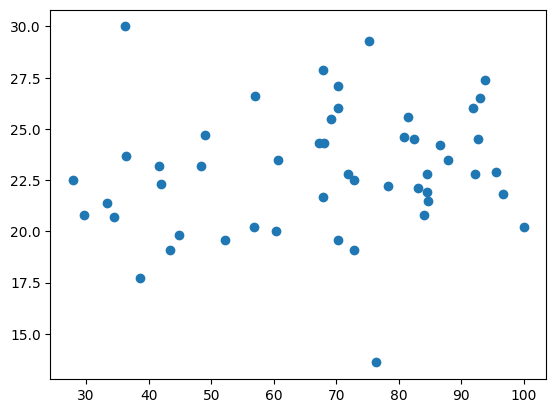

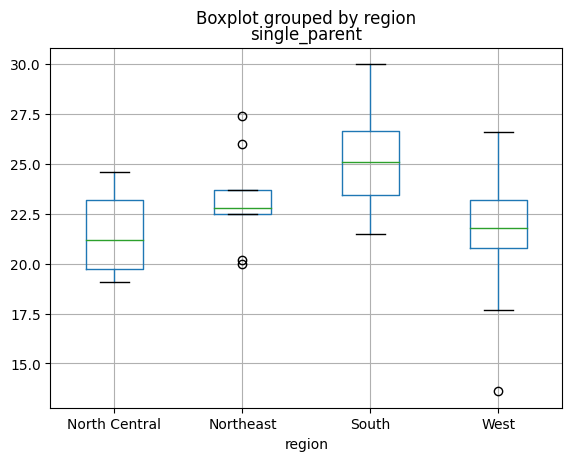

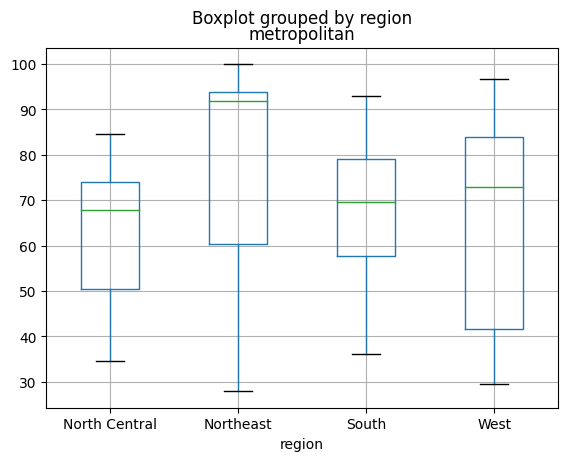

In [62]:
plt.scatter(dataset["metropolitan"], dataset["single_parent"])
dataset.boxplot(column=["single_parent"], by='region')
dataset.boxplot(column=["metropolitan"], by='region')

The quantitative variables show only a mild correlation at worst, so there's not going to be any interaction between them. The boxplots show there might be some between both quantitative terms and `region`, however, so let's conduct an ANOVA test for each to make sure:

In [72]:
single_parent_lm = ols('single_parent ~ region', data=dataset).fit()
metropolitan_lm = ols('metropolitan ~ region', data=dataset).fit()
print("single_parent:\n",sm.stats.anova_lm(single_parent_lm), "\n")
print("metropolitan:\n", sm.stats.anova_lm(metropolitan_lm))

single_parent:
             df      sum_sq    mean_sq         F    PR(>F)
region     3.0  142.469044  47.489681  7.046493  0.000538
Residual  46.0  310.015956   6.739477       NaN       NaN 

metropolitan:
             df        sum_sq     mean_sq         F    PR(>F)
region     3.0    873.927247  291.309082  0.675303  0.571609
Residual  46.0  19843.268953  431.375412       NaN       NaN


While the ANOVA test for `metropolitan` was insignificant, the one for `single_parent` was significant (very much so), indicating an interaction between the terms. So we'll add this to our model. And since that's the last thing we need to check for in our model building process, that gives us our final model. 

So here is the model I got, with its details below:

In [44]:
final_model = ols('murder_rate ~ region + single_parent + metropolitan + (single_parent * region)', data=dataset).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:            murder_rate   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           8.79e-08
Time:                        17:34:06   Log-Likelihood:                -88.830
No. Observations:                  50   AIC:                             195.7
Df Residuals:                      41   BIC:                             212.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

This model leaves something to be desired, however. Firstly, it only has a middling $R^2$ value at best ($R^2 = 0.669$). Secondly, region is are geographical, so the model is not as helpful in determining what the driving socio-economic factors for the murder rate of a given state are in general. To get a more helpful model for this, we should pursue a backwards selction strategy, but with `region` excluded from the start. 

While it's doubtful that the model would produce a better $R^2$ value, let's fit a model without `region` and see:

In [43]:
model2 = ols('murder_rate ~ poverty + high_school + college + single_parent + unemployed + metropolitan', data=dataset).fit()
print("Model R^2:", round(model2.rsquared,3))

Model R^2: 0.576


This $R^2$ is not only about 10% worse than before, but it's below $0.6$, rendering it essentially useless, especially since eliminating variables would decrease this value even further by definition. Unless, of course, it's in the range of useability for the relevant discipline; perhaps it is, but I don't have the domain knowledge to say. But from a general statistical perspective, a model with an $R^2$ value like that isn't worth keeping. So I'll stick with the model we came to earlier (`final_model`).

## Part 2: Assumption Checking
Now that we have out model, we can run diagnostics on it to see how appropriate a linear model is for this data to begin with. As with any statistical test, we assume this data is a representative sample; seeing as all 50 states are in the set, that is definitely satisfied. Here are the assumptions about the data that a linear model specifically makes:
1. Each datapoint is independent of all others.
2. The response variable ($Y$ data) is normally distributed about the regression line/surface.
3. This normal distribution has a mean of 0.
4. This normal distribution has a constant variance along the regression line/surface (i.e. it is <i>homoskedastic</i>).
5. The response variable is linearly related to the explanatory variables. 

Let's see how these hold up with our data and model.

### 1. Is each data point independent of all others?
Simply looking at the statistics, the significance of the `region` variable suggests that the datapoints (individual states) are <i>not</i> statistically independent, since it implies that states can be grouped into meaningful, distinguishing areas with respect to murder rate. This means that if, for instance, I knew the murder rate in North Carolina, and know it's in the same region as South Carolina, that tells me something about South Carolina's murder rate. So I would say the assumption is <u>violated</u>, but we'll proceed with the analysis regardless. 

## 2. Is the response variable normally distributed about the regression surface?
There are several ways to determine this, but I'll use a Q-Q plot here. Below is the Q-Q plot for our final model:

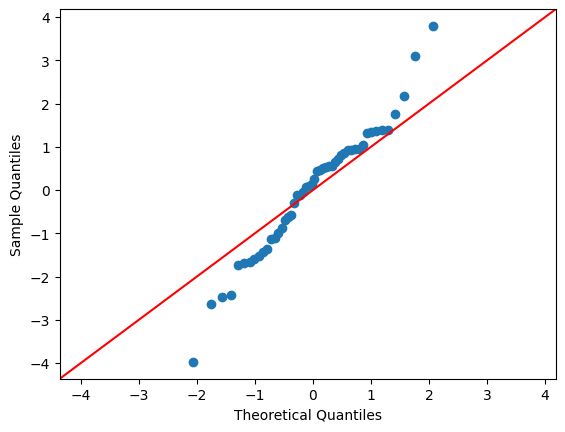

In [53]:
sm.qqplot(final_model.resid, line="45")
plt.show()

If the dataset were perfectly normally distributed, the points would be on the red line. They clearly deviate a bit, but only the right-most two points, and the left-most point are way off. So I'd say that this assumption is basically <u>satisfied</u>. 

### 3, 4, and 5: Is it the <i>right</i> normal distribution?

We can analyze these three assumptions with the following plot of the residuals.

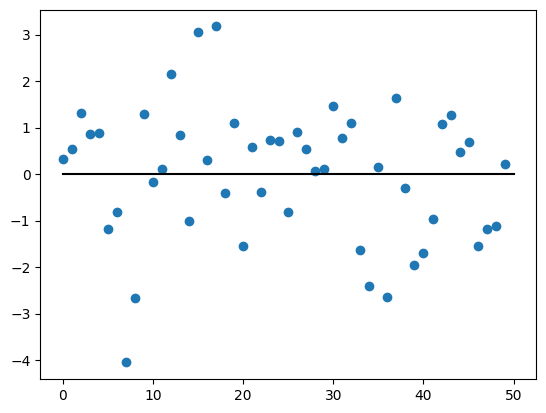

In [79]:
plt.scatter(range(50),final_model.resid)
plt.plot([0,50],[0,0], "k-")  # adds horizontal line at y=0

#### 3. Is the distribution entered at zero?
For this, we need only check to see if the points (residuals) are balanced on either side of the zero-line, which they are, so <u>assumption 3 is satisfied</u>. 

#### 4. Is the distribution homoskedastic?
For this, we check if the residuals are distributed around the zero line at about the same width, and I would say that they are with a couple outliers. But let's run a test to make sure: 

In [90]:
# the Breusch-Pagan test for heteroskedacity
test_results = sm.stats.diagnostic.het_breuschpagan(final_model.resid, final_model.model.exog)
print("p-value:", round(test_results[1],3))  # second value is p-value according to docs

p-value: 0.246


The p-value is large, so the data is probably homoskedastic. So, <u>assumption 4 is satisfied</u>. 


#### 5. Are the variables linearly related?
Seeing as the residuals don't drift off or spread from the zero-line when we are fitting the data with a hyperplane, then that linear relationship holds, and <u>assumption 5 is satisfied</u>.

### Model Diagnostics Conclusion
All assumptions seem reasonably well satisfied, so we have a model that is appropriate for the data, as well as one from which we can make valid inferences. 

# Machine learning approach

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

crimeData = pd.read_csv('crime.csv') # Read the data

Since we want the murder rate to be the target variable, the rest will be the predictors.

In [64]:
x = crimeData.drop(['murder_rate'], axis=1)  # Drop murder rate, state, and region.
y = crimeData['murder_rate']               # y should be the murder rate.

Next, we need to split the data into test and train data for each of the predictors.   
The split should be 80% training, and 20% test.

I decided to take out the state since it is basically a key value, and the region because it is categorical.

In [59]:
# The test size is set to 20%, and the training size is implied 80%.
xTrain, xTest, yTrain, yTest = train_test_split(x[['poverty',
                                                   'high_school',
                                                   'college',
                                                   'single_parent',
                                                   'unemployed',
                                                   'metropolitan']], y, test_size=0.2)

Now the model needs to be trained and then evaluated on the test data.

In [67]:
lrModel = LinearRegression()  # This comes from the sklearn.linear_model library.
lrModel.fit(xTrain, yTrain)

yPredict = lrModel.predict(xTest)
mse = mean_squared_error(yTest, yPredict)
r2 = r2_score(yTest, yPredict)

In [70]:
# print(f'Test MSE: {mse}')
# print(f'Test  R2: {r2}')

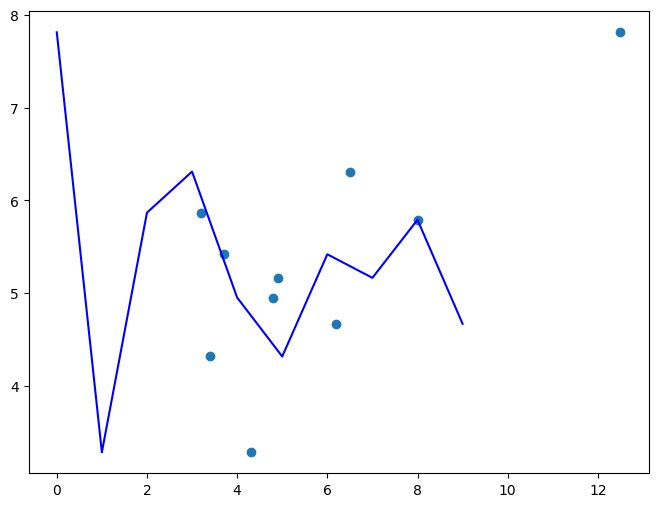

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(yTest, yPredict)
plt.plot(yPredict, color='blue', label='Regression Line')
plt.show()